In [1]:
import pandas as pd

In [17]:
train = pd.read_csv('./data/train.csv', dtype={'acoustic_data': np.int16, 'time_to_failure': np.float32})
                    #,engine='python',nrows = 500)
train.head()

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


In [18]:
train.shape

(629145480, 2)

In [3]:
train.rename({"acoustic_data":"signal","time_to_failure":"quaketime"},axis="columns",inplace=True)
train.head()

,signal,quaketime
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


In [4]:
for idx in range(5):
    print(train.quaketime.values[idx])

1.4690999832
1.4690999821000001
1.4690999809999998
1.4690999799000002
1.4690999787999999


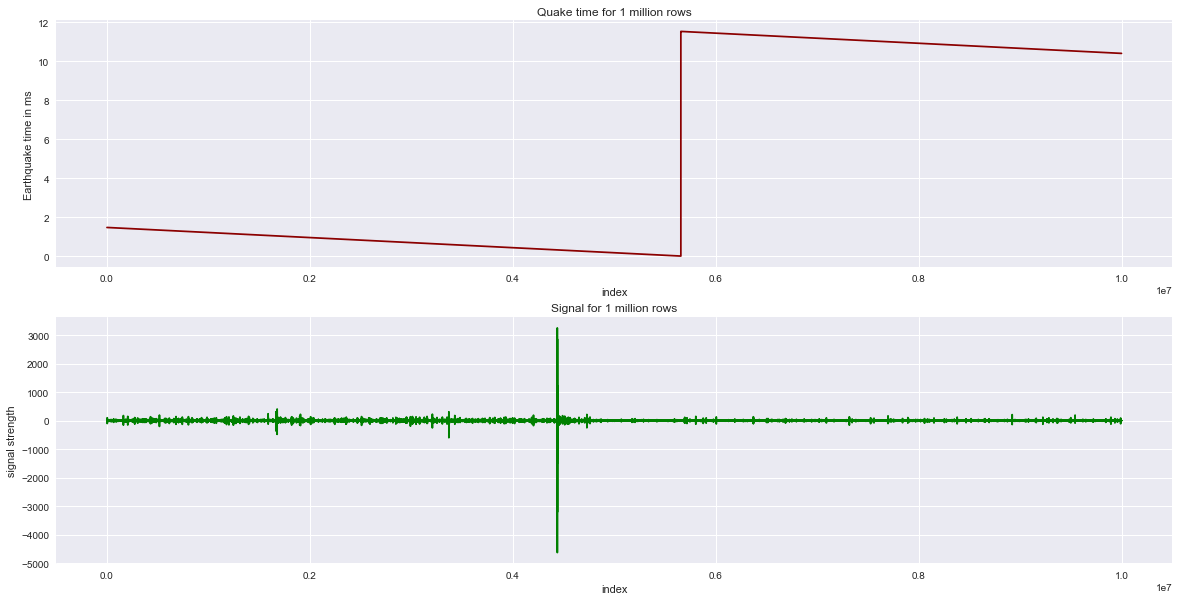

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.rcParams['axes.grid'] = True
%matplotlib inline

fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(20,10))
ax[0].plot(train.index.values,train.quaketime.values,c='darkred')
ax[0].set_title("Quake time for 1 million rows")
ax[0].set_xlabel('index')
ax[0].set_ylabel('Earthquake time in ms')

ax[1].plot(train.index.values,train.signal.values,c='green')
ax[1].set_title("Signal for 1 million rows")
ax[1].set_xlabel("index")
ax[1].set_ylabel("signal strength")
plt.show()

Observations:
-------------
1 million rows:
-------------
1. Quaketime becomes 0 only once in the entire time.
2. Lot of small oscillations are present till we get a huge peak in the simulation in lab.


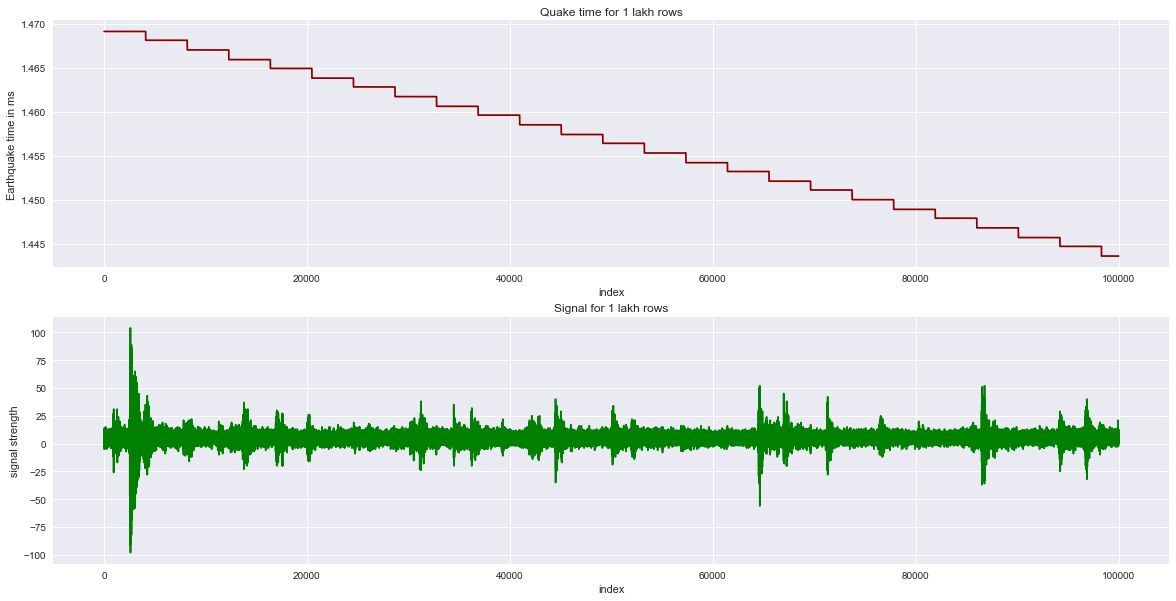

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(20,10))
ax[0].plot(train.index.values[:100000],train.quaketime.values[:100000],c='darkred')
ax[0].set_title("Quake time for 1 lakh rows")
ax[0].set_xlabel('index')
ax[0].set_ylabel('Earthquake time in ms')

ax[1].plot(train.index.values[:100000],train.signal.values[:100000],c='green')
ax[1].set_title("Signal for 1 lakh rows")
ax[1].set_xlabel("index")
ax[1].set_ylabel("signal strength")
plt.show()

Observations:
----------------
1 lakh rows
-------------
::Quaketime::
1. Quaketime seems to be like a step function.
2. It is decreasing as the time progresses.
3. So, is it dependent on previous quake times in sequence ???????

::Signal strength::
1. Intially, the between first 2,00,000 rows there seems to be a lot of variation.
2. To naked eye almost same type of signals are generated in similar pattern from later.

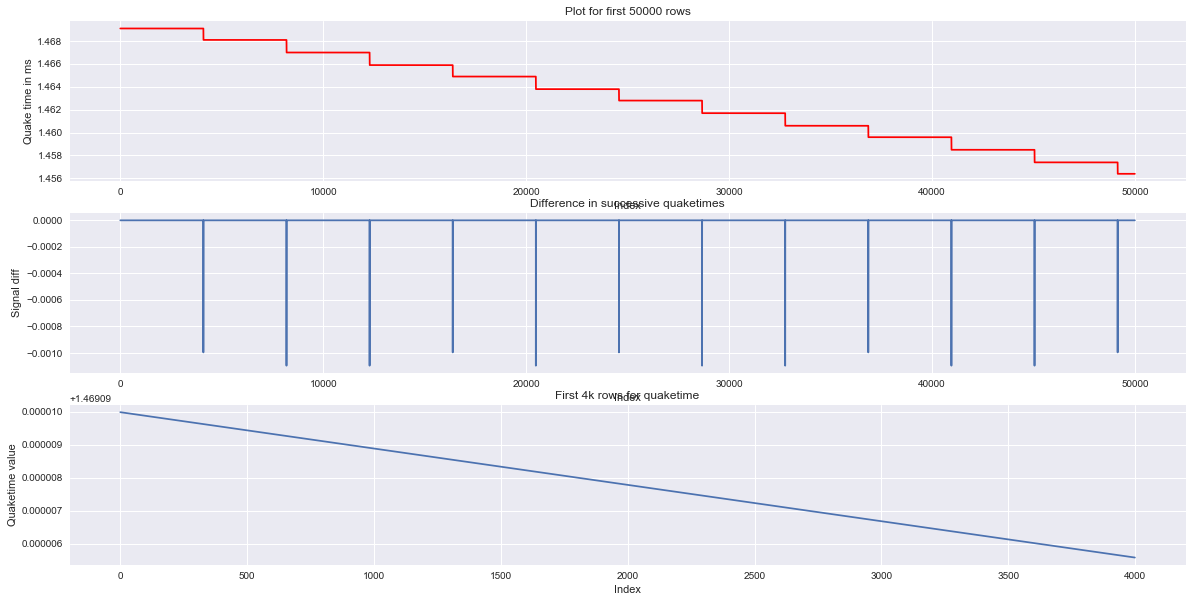

In [7]:
import numpy as np
fig,ax = plt.subplots(nrows=3,ncols=1,figsize = (20,10))

ax[0].plot(train.index.values[:50000],train.quaketime.values[:50000],c='Red')
ax[0].set_title("Plot for first 50000 rows")
ax[0].set_xlabel("Index")
ax[0].set_ylabel("Quake time in ms")


ax[1].plot(train.index.values[:49999],np.diff(train.quaketime.values[:50000]))
ax[1].set_title("Difference in successive quaketimes")
ax[1].set_xlabel("Index")
ax[1].set_ylabel("Signal diff")

ax[2].plot(train.index.values[:4000],train.quaketime.values[:4000])
ax[2].set_title("First 4k rows for quaketime")
ax[2].set_xlabel("Index")
ax[2].set_ylabel("Quaketime value")
plt.show()

Observations
------------
1. Quaketime is decreasing in the first 50000 rows like step function as seen in 1 lakh rows
2. Quaketime is almost same with sudden drop in the middle. After that pattern follows
3. with in values of first drop quaketimes seems to be decreasing function but the change is not that significant

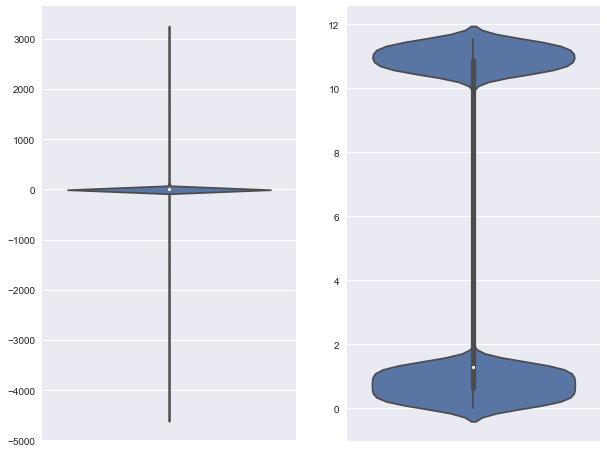

In [8]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,8))

sns.violinplot(y=train.signal.values,ax=ax[0])
sns.violinplot(y=train.quaketime.values,ax=ax[1])
plt.show()

In [9]:
train.describe()

,signal,quaketime
count,1.000000e+07,1.000000e+07
mean,4.502072e+00,5.183598e+00
std,1.780707e+01,5.091286e+00
min,-4.621000e+03,7.954798e-04
25%,2.000000e+00,6.498971e-01
50%,4.000000e+00,1.298899e+00
75%,7.000000e+00,1.089170e+01
max,3.252000e+03,1.154080e+01


In [10]:
window_sizes = [10, 50, 100, 1000]
for window in window_sizes:
    train["rolling_mean_" + str(window)] = train.signal.rolling(window=window).mean()
    train["rolling_std_" + str(window)] = train.signal.rolling(window=window).std()

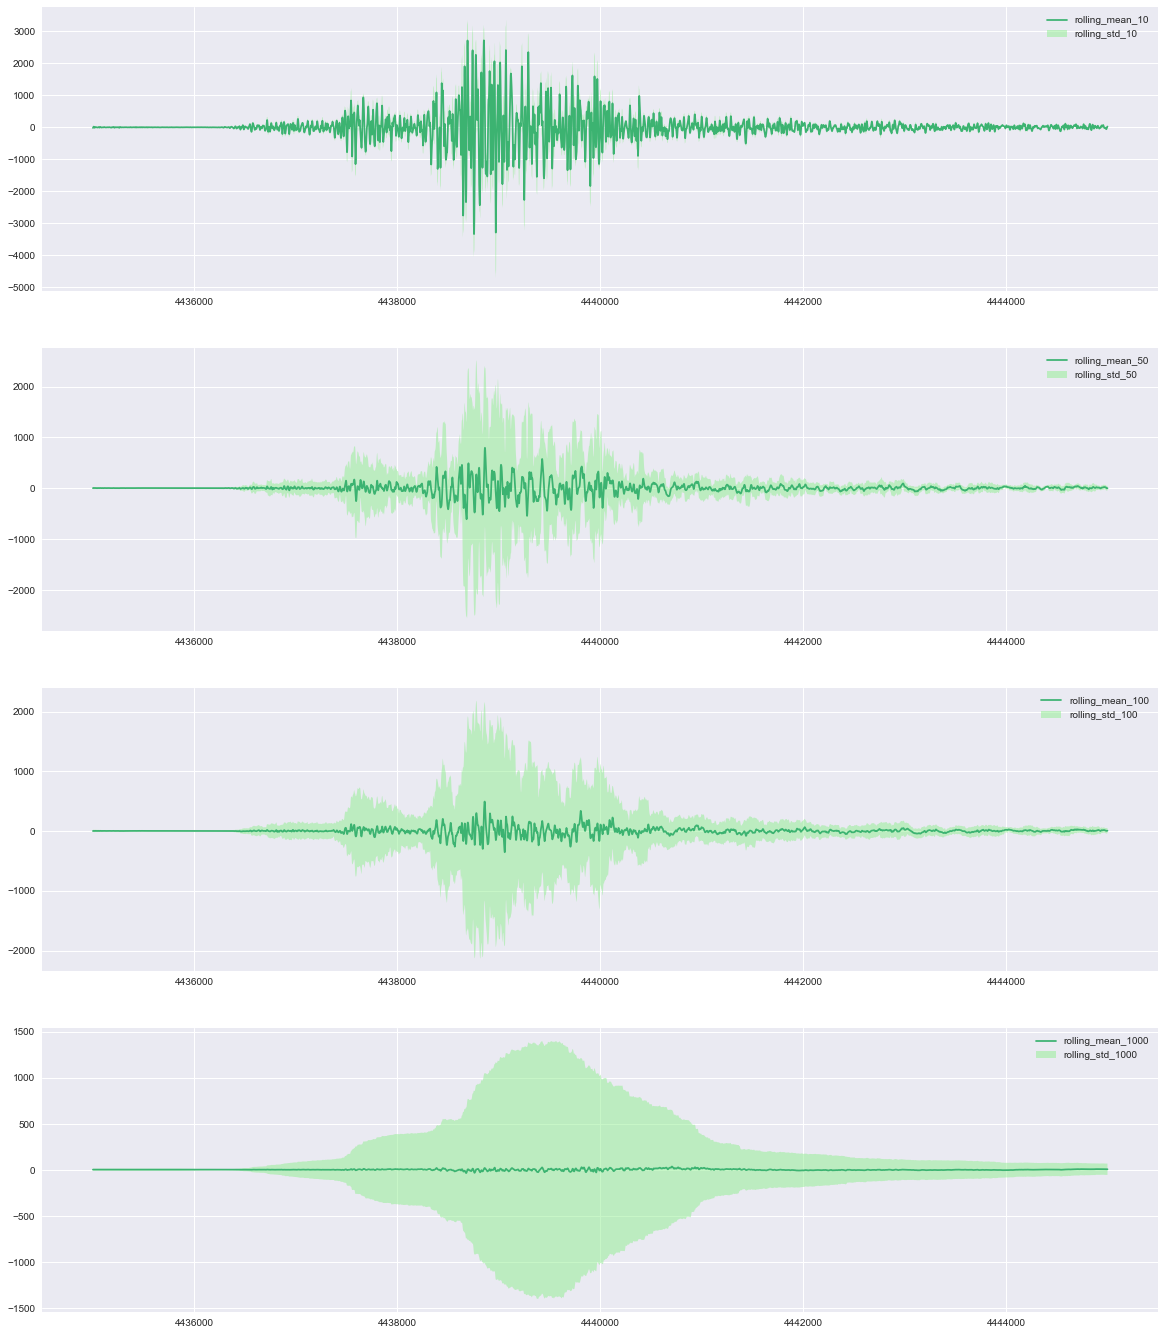

In [11]:
fig, ax = plt.subplots(len(window_sizes),1,figsize=(20,6*len(window_sizes)))

n = 0
for col in train.columns.values:
    if "rolling_" in col:
        if "mean" in col:
            mean_df = train.iloc[4435000:4445000][col]
            ax[n].plot(mean_df, label=col, color="mediumseagreen")
        if "std" in col:
            std = train.iloc[4435000:4445000][col].values
            ax[n].fill_between(mean_df.index.values,
                               mean_df.values-std, mean_df.values+std,
                               facecolor='lightgreen',
                               alpha = 0.5, label=col)
            ax[n].legend()
            n+=1

In [13]:
train["rolling_q25"] = train.signal.rolling(window=50).quantile(0.25)
train["rolling_q75"] = train.signal.rolling(window=50).quantile(0.75)
train["rolling_q50"] = train.signal.rolling(window=50).quantile(0.5)
train["rolling_iqr"] = train.rolling_q75 - train.rolling_q25
train["rolling_min"] = train.signal.rolling(window=50).min()
train["rolling_max"] = train.signal.rolling(window=50).max()
train["rolling_skew"] = train.signal.rolling(window=50).skew()
train["rolling_kurt"] = train.signal.rolling(window=50).kurt()

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 18 columns):
signal               int64
quaketime            float64
rolling_mean_10      float64
rolling_std_10       float64
rolling_mean_50      float64
rolling_std_50       float64
rolling_mean_100     float64
rolling_std_100      float64
rolling_mean_1000    float64
rolling_std_1000     float64
rolling_q25          float64
rolling_q75          float64
rolling_q50          float64
rolling_iqr          float64
rolling_min          float64
rolling_max          float64
rolling_skew         float64
rolling_kurt         float64
dtypes: float64(17), int64(1)
memory usage: 1.3 GB


In [15]:
train.head()

,signal,quaketime,rolling_mean_10,rolling_std_10,rolling_mean_50,rolling_std_50,rolling_mean_100,rolling_std_100,rolling_mean_1000,rolling_std_1000,rolling_q25,rolling_q75,rolling_q50,rolling_iqr,rolling_min,rolling_max,rolling_skew,rolling_kurt
0,12,1.4691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,1.4691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,1.4691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,1.4691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,1.4691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1]:
import numpy as np

In [ ]:
freqs = np.fft.fftfreq(data.size, time_step)
idx = np.argsort(freqs)